## Calcular las métricas de evaluación en regresión, clasificación binaria y clasificación multiclase.

### 1. Dado un conjunto de 30 datos de test, con la variable objetivo real y la salida proporcionada por dos modelos.
- a. Calcular las métricas de regresión para cada modelo.
- b. En función de los resultados, decidir qué modelo es mejor

In [1]:
import numpy as np
import pandas as pd
import statistics

A = np.matrix('2.5 3 2; 3 2.9 2;1.6 2 2;8 8.1 7;4.56 4 5;5.25 5 5;7 7.8 8; 5.25 6 5;6.5 6 7;10.5 10 11;25 10 24;2.3 2 2;5.4 5 6; 6.8 7 8; 7.9 8.5 8.5;4.5 4 5;3.5 4 5;3 4.5 4.5; 2 2.5 3; 1 1.23 0.9; 0 1 0.5; 5.6 5 6;7 6.8 7.3; 8.5 9.6 9; 9 10.2 10;10.2 10 10;5 4.9 5.2; 4.3 4 4.6;2 0 1.9; 4.3 4 5')
df = pd.DataFrame(A, columns = ['y_objetivo','pred_m1','pred_m2'])
df

,y_objetivo,pred_m1,pred_m2
0,2.50,3.00,2.0
1,3.00,2.90,2.0
2,1.60,2.00,2.0
3,8.00,8.10,7.0
4,4.56,4.00,5.0
5,5.25,5.00,5.0
6,7.00,7.80,8.0
7,5.25,6.00,5.0
8,6.50,6.00,7.0
9,10.50,10.00,11.0


Ahora es necesario calcular la media y la varianza para poder normalizar los datos de ambas predicciones

In [2]:
# Using statistics.median() from statistics
media1 = statistics.median(df.pred_m1)
media2 = statistics.median(df.pred_m2)

# Deviacion media
varianza1 = df.pred_m1.mad()
varianza2 = df.pred_m2.mad()

# Printing result
print("Mediana de la predicción 1 es : " + str(media1))
print("Mediana de la predicción 2 es : " + str(media2))
print(' ')
print("Varianza de la predicción 1 es : " + str(varianza1))
print("Varianza de la predicción 2 es : " + str(varianza2))

Mediana de la predicción 1 es : 4.95
Mediana de la predicción 2 es : 5.0
 
Varianza de la predicción 1 es : 2.4258666666666664
Varianza de la predicción 2 es : 2.9102222222222216


Ahora normalizo los datos de las predicciones

In [3]:
for i in range(len(df.pred_m1)):
    df.pred_m1[i]= (df.pred_m1[i] - media1)/varianza1
    
for i in range(len(df.pred_m2)):
    df.pred_m2[i]= (df.pred_m2[i] - media1)/varianza2

Ahora quiero escalar la variable para que  me queden valores entre 0 y 1

In [4]:
for i in range(len(df.pred_m1)):
    df.pred_m1[i]= (df.pred_m1[i] - min(df.pred_m1))/(max(df.pred_m1) - min(df.pred_m1))
    
for i in range(len(df.pred_m2)):
    df.pred_m2[i]= (df.pred_m2[i] - min(df.pred_m2))/(max(df.pred_m2) - min(df.pred_m2))

**Error absoluto medio ( Mean Absolute Error, MAE):**

Que la diferencia entre la predicción y el valor real sea el menor posible.

El error absoluto medio, o MAE, es una métrica popular 

El MAE se puede calcular de la siguiente manera:

MAE = 1 / N * suma para i a N abs (y_i – yhat_i)
Dónde y_i es el i-ésimo valor esperado en el conjunto de datos, yhat_i es el i-ésimo valor predicho y abdominales() es la función absoluta.

desde matplotlib importar pyplot

desde sklearn.métrica importar mean_squared_error

errores = lista()

para yo en rango(len(esperado)):

errar = abdominales((esperado[[yo] – predicho[[yo]))

errores.adjuntar(errar)

In [5]:
from sklearn.metrics import mean_absolute_error
from numpy import mean

mae1= mean_absolute_error(df.y_objetivo, df.pred_m1)
mae2 = mean_absolute_error(df.y_objetivo, df.pred_m2)

print(mae1)
print(mae2)

5.2034454045324985
5.308651698143156


In [6]:
# En esta lista guardo los errores
errores1 = []
errores2 = []
# Recorro la lista de la columna objetivo
for i in range(len(df.y_objetivo)):
    
        error1 = df.y_objetivo[i] - df.pred_m1[i]  
        error2 = df.y_objetivo[i] - df.pred_m2[i]
        
        errores1.append(error1)
        errores2.append(error2)
    
c1 = mean(errores1)
c2 = mean(errores2)

print (c1)
print (c2)

5.19690945682008
5.308651698143156


**MSE Mean Squared Error(Error medio cuadrado)**

El MSE se calcula como la media o el promedio de las diferencias al cuadrado entre los valores objetivo predichos y esperados en un conjunto de datos.

errores = []
err = (esperado[i]-predicho[i])**2

for i in range(len(esperado)):

	err= (esperado[i]-predicho[i])**2
	errores.append(err)

In [7]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(df.y_objetivo, df.pred_m1)

#mse11 = np.sqrt((df.y_objetivo - df.pred_m1) ** 2)

mse2 = mean_squared_error(df.y_objetivo, df.pred_m2)

# mse = (np.square(df.y_objetivo, df.pred_m1)).mean()

print (mse1)        
print (mse2)

44.98281126561677
46.22374746296811


**El error cuadrático medio, o RMSE**

El RMSE se puede calcular de la siguiente manera:

RMSE = sqrt (1 / N * suma de i a N (y_i – yhat_i) ^ 2)
Dónde y_i es el i-ésimo valor esperado en el conjunto de datos, yhat_i es el i-ésimo valor predicho, y sqrt () es la función raíz cuadrada.

In [8]:
# sklearn.métrica importar mean_squared_error
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(((df.y_objetivo - df.pred_m1) ** 2).mean())
rmse2 = np.sqrt(((df.y_objetivo - df.pred_m2) ** 2).mean())

print(rmse1)
print(rmse2)

6.706922637515418
6.798804855485125


In [9]:
# initialize list of lists
data = [['Predicción 1', mae1, mse1,rmse1], ['Predicción 2', mae2,mse2,rmse2]]
  
# Create the pandas DataFrame
df1 = pd.DataFrame(data, columns=['Prediccion', 'MAE','MSE','RMSE'])
  
# print dataframe.
df1

,Prediccion,MAE,MSE,RMSE
0,Predicción 1,5.203445,44.982811,6.706923
1,Predicción 2,5.308652,46.223747,6.798805


### 2. Dado un problema de clasificación binaria (sólo existen dos clases),tenemos la salida de cada uno de 30 patrones en test para dosmodelos distintos.
- a. Montar la matriz de confusión de cada modelo.
- b. Calcular las métricas de clasificación, excepto el AUC.
- c. Determinar qué modelo es mejor.


In [10]:
B = np.matrix('0 1 0; 0 0 0;0 0 0; 1 1 1;1 1 1;1 1 1;0 0 0; 0 0 1; 1 0 1;1 0 1;0 0 1;1 1 0;0 0 1;1 1 1;1 0 1; 1 1 1;1 0 1; 0 0 0; 0 0 0;0 0 0; 0 0 0; 0 0 1; 0 0 1; 0 0 0; 0 0 0; 0 0 0;0 0 1;0 0 0;0 0 1;0 0 1')

df2 = pd.DataFrame(B, columns = ['y_objetivo','m1','m2'])
df2


,y_objetivo,m1,m2
0,0,1,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1
5,1,1,1
6,0,0,0
7,0,0,1
8,1,0,1
9,1,0,1


Montar la matriz de confusión de cada modelo.

In [11]:
import seaborn as snNew
import pandas as pdNew
import matplotlib.pyplot as pltNew

import pandas as pd

df_confusion1 = pd.crosstab(df2.y_objetivo, df2.m1)
df_confusion1

m1,0,1
y_objetivo,,
0,19,1
1,4,6


In [12]:
df_confusion2 = pd.crosstab(df2.y_objetivo, df2.m2)
df_confusion2

m2,0,1
y_objetivo,,
0,12,8
1,1,9


Calcular las métricas de clasificación, excepto el AUC

**CCR**

Precision = TP / (TP + FP)

In [13]:
from sklearn.metrics import precision_score

precision1 = precision_score(df2.y_objetivo, df2.m1)
print(precision1)

precision2 = precision_score(df2.y_objetivo, df2.m2)
print(precision2)

0.8571428571428571
0.5294117647058824


**TPRate (Sensibilidad)**

Recall = TP / (TP + FN)

In [14]:
from sklearn.metrics import recall_score

sensibilidad1= recall_score(df2.y_objetivo, df2.m1)
sensibilidad2= recall_score(df2.y_objetivo, df2.m2)

print(sensibilidad1)
print(sensibilidad2)

0.6
0.9


**F1- Score (Recall o TP Rate)**

F1 = 2 * ((recall * precision)/(recall + precision))

In [15]:
from sklearn.metrics import f1_score

score1 = f1_score(df2.y_objetivo, df2.m1)
score2 = f1_score(df2.y_objetivo, df2.m2)

print(score1)
print(score2)

0.7058823529411764
0.6666666666666667


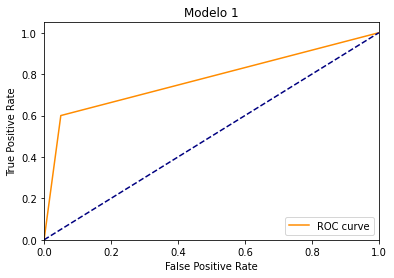

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df2.y_objetivo, df2.m1)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modelo 1')
plt.legend(loc="lower right")
plt.show()

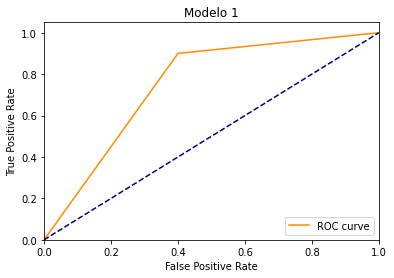

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df2.y_objetivo, df2.m2)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modelo 1')
plt.legend(loc="lower right")
plt.show()

array([[12,  8],
       [ 1,  9]], dtype=int64)

### 3. Dada la siguiente matriz de confusión para un problema multiclase, se pide hallar todas las métricas de clasificación para cada clase, excepto el AUC. 

Recuerde que, para calcular las métricas de una clase, se considera dicha clase como positiva y el resto como la negativa.

**CCR**

ccr = (TP+TN)/N

Primero tengo que calcular las submatrices de cada una de las clases en POSITIVE NEGATIVE

- Gato- No gato
- Perro - No perro
- Loro - No loro

Entonces genero las submatrices calculando: 

Cuantos de gato calculados como gato son gato POSITIVE

**Cuantos de gato han sido clasificados como NO gato (sumo los demás categorias)** NEGATIVE

Así consigo el ROW de GATO- gato -NoGato

Ahora hago el ROW de NoGato - gato-NoGato

Aí es como logro la submatriz


Sub matriz de Gato

$$\begin{bmatrix} 20 & 15 \\ 10 & 60 \end{bmatrix}$$

Sub matriz de Perro

$$\begin{bmatrix} 30 & 5 \\ 15 & 55 \end{bmatrix}$$

Sub matriz de Loro

$$\begin{bmatrix} 25 & 10 \\ 40 & 35 \end{bmatrix}$$

**CCR**

Se calcula sumando los patrones de la diagonal principal del array, entre el numero total de patrones.

In [19]:
ccr1 = (20+30+25)/95
print(ccr1)

0.7894736842105263


**Sensibilidad**

sensibilidad = TP/TP+FN

In [25]:
sens_array = [] 
sen_gato = 20/(20+15)
sens_array.append(sen_gato)

sen_perro = 30/(30+5)
sens_array.append(sen_perro)

sen_loro = 25/(25+10)
sens_array.append(sen_loro)

sensibilidad = mean(sens_array)

print(sen_gato)
print(sen_perro)
print(sen_loro)

print('La media de la sensibilidad es', sensibilidad)

0.5714285714285714
0.8571428571428571
0.7142857142857143
La media de la sensibilidad es 0.7142857142857143


FP RATE

In [21]:
esp_array = [] 

esp_gato = 60/(60+10)
esp_array.append(esp_gato)

esp_perro = 55/(55+15)
esp_array.append(esp_perro)

esp_loro = 35/(35+40)
esp_array.append(esp_loro)


especificidad = mean(esp_array)

print(esp_gato)
print(esp_perro)
print(esp_loro)

print('La media de la especificidad es', especificidad)

0.8571428571428571
0.7857142857142857
0.4666666666666667
La media de la especificidad es 0.7031746031746032


**Precision global**

ccr = TP+TN/N

In [22]:
ccr_array = []

ccr_gato = (20+60)/105
ccr_array.append(ccr_gato)

ccr_perro = (30+55)/105
ccr_array.append(ccr_perro)

ccr_loro = (25+35)/105
ccr_array.append(ccr_loro)

precision = mean(ccr_array)

print(ccr_gato)
print(ccr_perro)
print(ccr_loro)

print('La media de la precision global es', precision)

0.7619047619047619
0.8095238095238095
0.5714285714285714
La media de la precision global es 0.7142857142857143


**FP Rate**

fprate = FP/(TN+FP)

In [23]:
fp_array = []

fprate_gato = 10/(60+10)
fp_array.append(fprate_gato)

fprate_perro = 15/(55+15)
fp_array.append(fprate_gato)

fprate_loro = 40/(35+40)
fp_array.append(fprate_gato)

fp = mean(fp_array)

print(fprate_gato)
print(fprate_perro)
print(fprate_loro)

print('La media del FP Rate es', fp)

0.14285714285714285
0.21428571428571427
0.5333333333333333
La media del FP Rate es 0.14285714285714285


**F1 SCORE**

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Precision = True Positive / (True Positive + False Positive)

Recall = True Positive / (True Positive + False Negative)


In [24]:
presicion_gato = 20/(20+10)
recall_gato = 20/(20+15)


presicion_perro = 30/(30+15)
recall_perro = 30/(30+5)


presicion_loro = 25/(25+40)
recall_loro = 25/(25+10)


score_array = []

f1_gato = 2*((presicion_gato * recall_gato)/(presicion_gato + recall_gato))
score_array.append(f1_gato)

f1_perro = 2*((presicion_perro * recall_perro)/(presicion_perro + recall_perro))
score_array.append(f1_perro)

f1_loro = 2*((presicion_loro * recall_loro)/(presicion_loro + recall_loro))
score_array.append(f1_loro)

f1score = mean(score_array)

print(f1_gato)
print(f1_perro)
print(f1_loro)


print('La media del F1 score es', f1score)

0.6153846153846153
0.75
0.5
La media del F1 score es 0.6217948717948718
